In [1]:
library("tidyverse")

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


**1. Turn a stacked bar chart into a pie chart using coord_polar()**

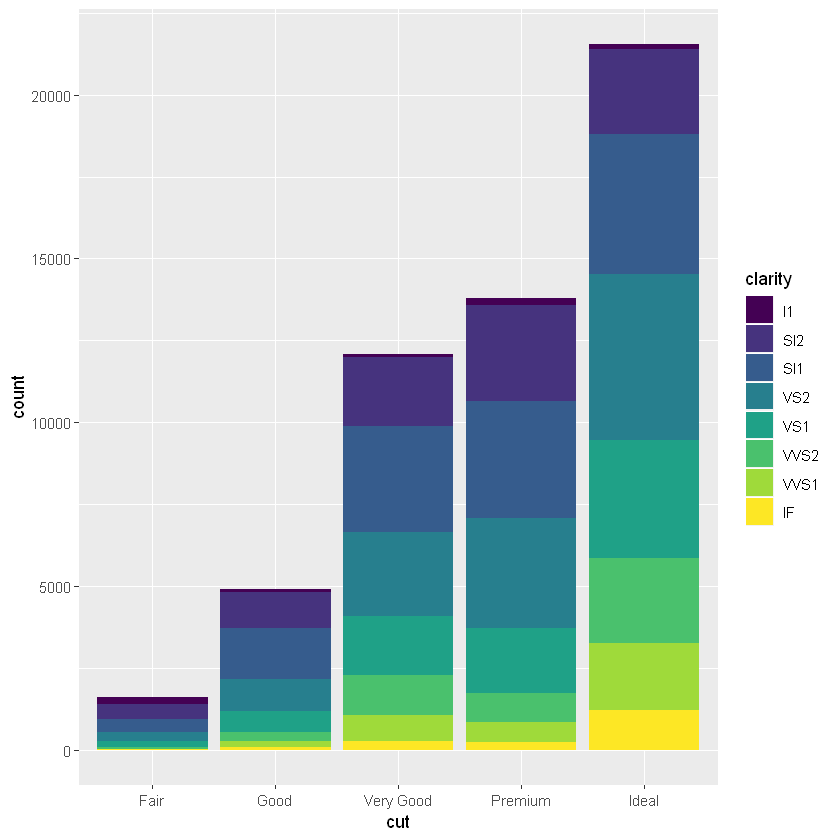

In [2]:
ggplot(data = diamonds) + 
    geom_bar(mapping = aes(x = cut, fill = clarity))

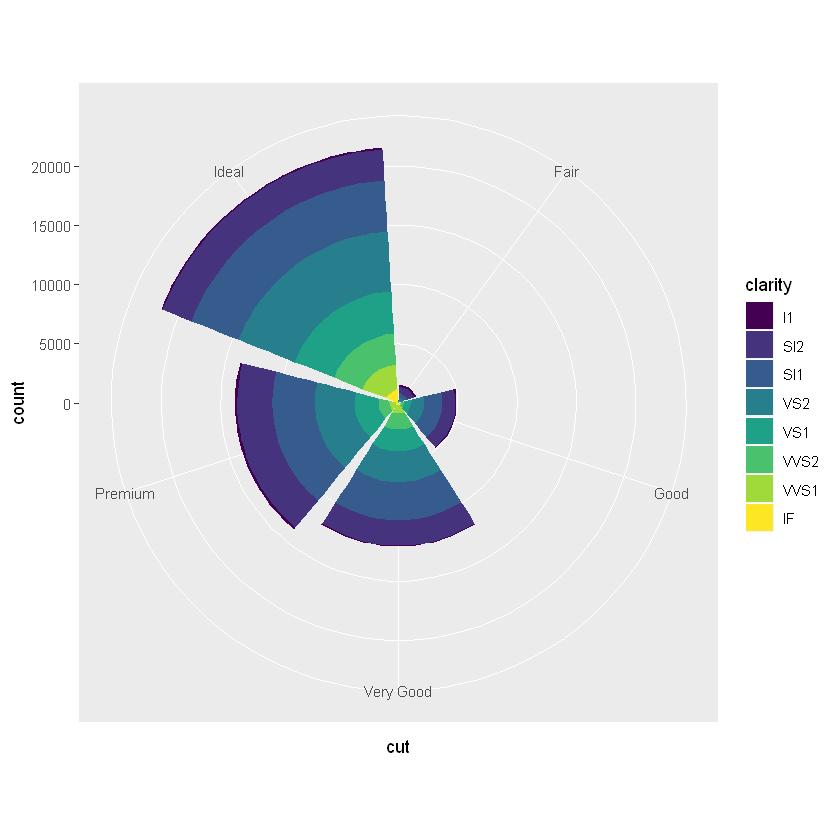

In [3]:
ggplot(data = diamonds) + 
    geom_bar(mapping = aes(x = cut, fill = clarity)) +
    coord_polar()

**2. What does labs() do? Read the documentation.**

In [4]:
?labs()

labs {ggplot2},R Documentation
...,A list of new name-value pairs. The name should be an aesthetic.
title,The text for the title.
subtitle,The text for the subtitle for the plot which will be displayed below the title.
caption,The text for the caption which will be displayed in the bottom-right of the plot by default.
tag,The text for the tag label which will be displayed at the top-left of the plot by default.
label,The title of the respective axis (for xlab() or ylab()) or of the plot (for ggtitle()).


_It modifies axis, legend, and plot labels_

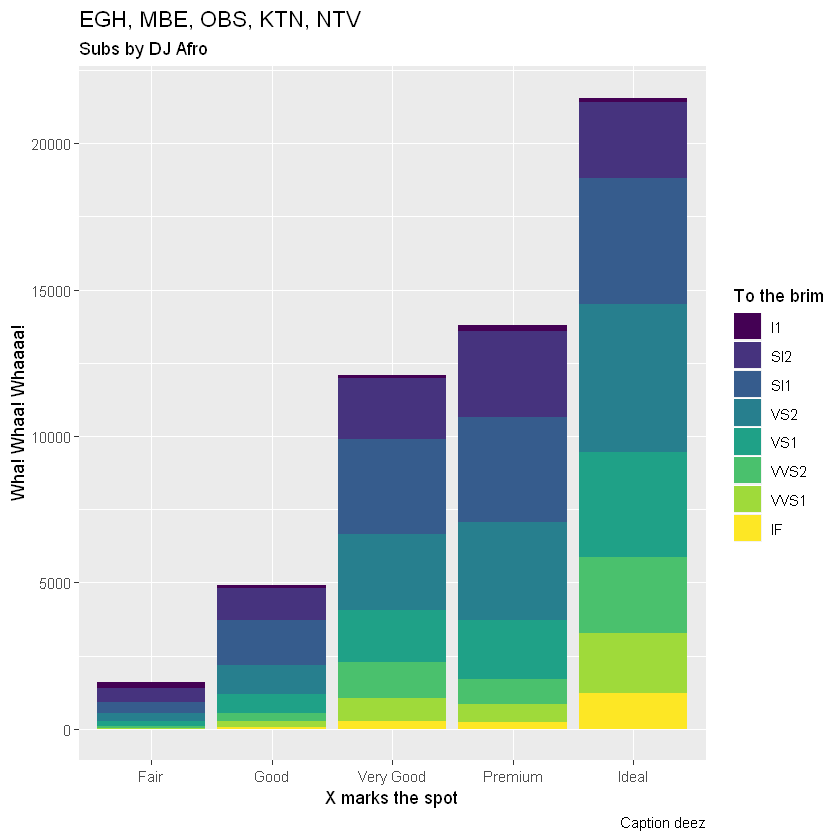

In [5]:
ggplot(data = diamonds) + 
    geom_bar(mapping = aes(x = cut, fill = clarity))+
    labs(title = "EGH, MBE, OBS, KTN, NTV",
         subtitle = "Subs by DJ Afro",
         x = "X marks the spot",
         y = "Wha! Whaa! Whaaaa!",
         fill = "To the brim",
         caption = "Caption deez")

**3. What’s the difference between coord_quickmap() and coord_map()?**

<ggproto object: Class CoordMap, Coord, gg>
    aspect: function
    backtransform_range: function
    clip: on
    default: FALSE
    distance: function
    is_free: function
    is_linear: function
    labels: function
    limits: list
    modify_scales: function
    orientation: NULL
    params: list
    projection: mercator
    range: function
    render_axis_h: function
    render_axis_v: function
    render_bg: function
    render_fg: function
    setup_data: function
    setup_layout: function
    setup_panel_params: function
    setup_params: function
    transform: function
    super:  <ggproto object: Class CoordMap, Coord, gg>

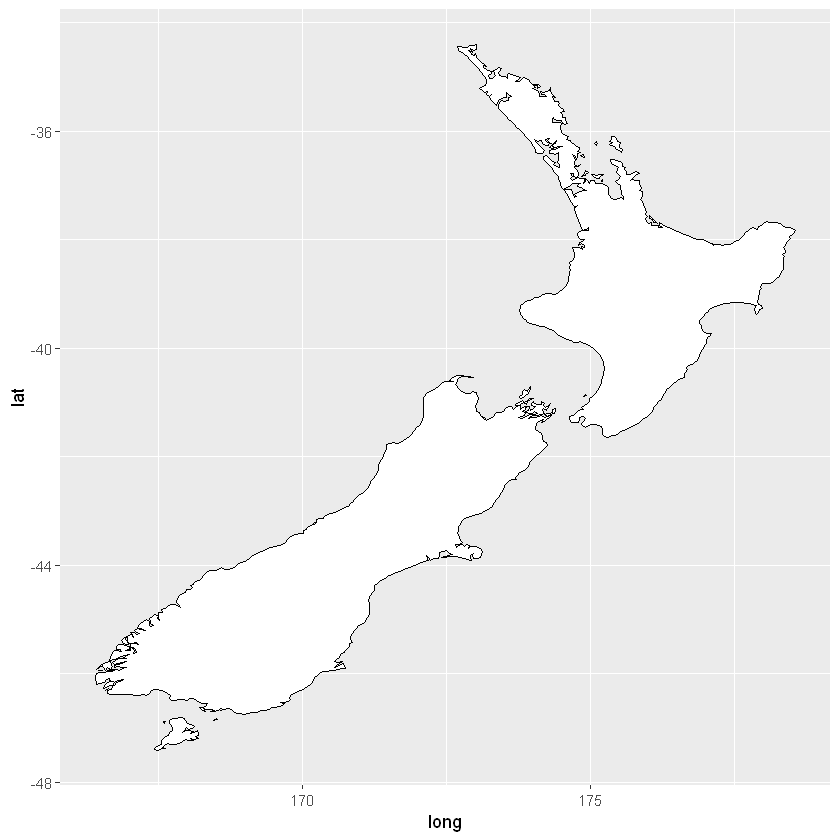

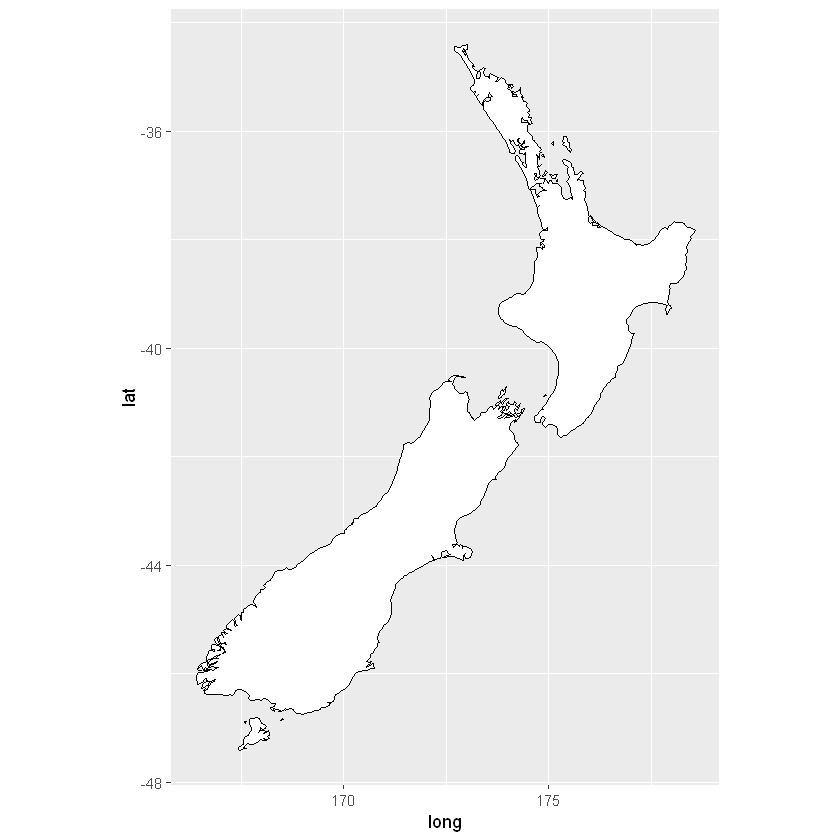

In [6]:
nz <- map_data("nz")
ggplot(nz, aes(long, lat, group = group)) +
    geom_polygon(fill = 'white', color = 'black')
    coord_map()
ggplot(nz, aes(long, lat, group = group)) +
    geom_polygon(fill = 'white', color = 'black') +
    coord_quickmap()

_`coord_quickmap()` sets the aspect ratio ignoring earth curvature and adjusting the map longitude and latitude coordinates ratio while `coord_map()` renders a 3D earth onto a 2D plane._

**4. What does the following plot tell you about the relationship between city and highway mpg? Why is coord_fixed() important? What does geom_abline() do?**

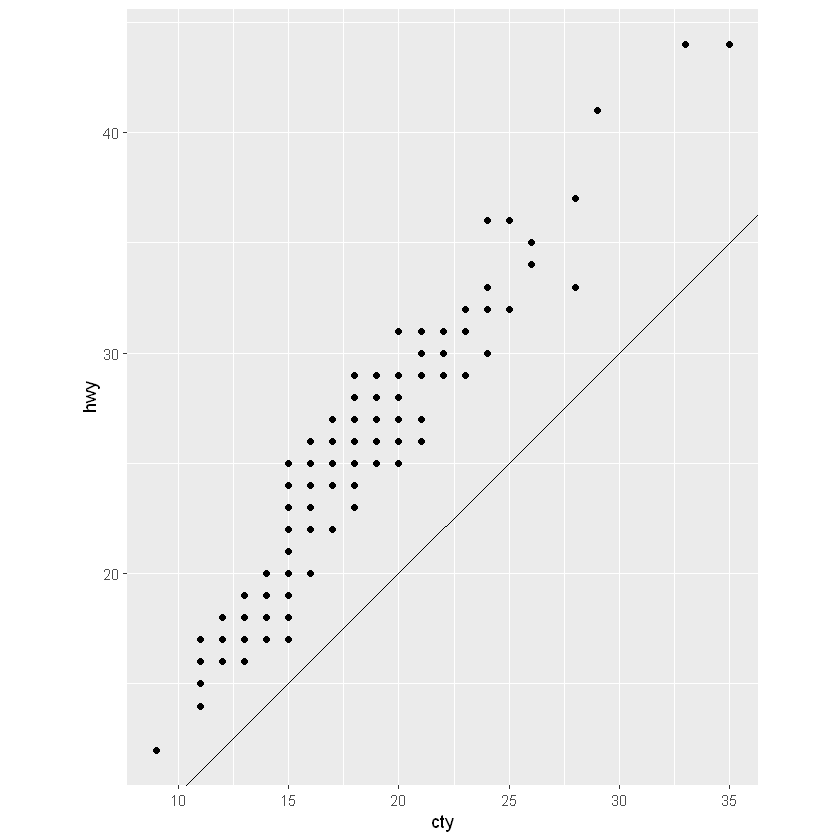

In [7]:
ggplot(data = mpg, mapping = aes(x = cty, y = hwy))+
    geom_point()+
    geom_abline()+
    coord_fixed()

From the plot we can see that there is a positive linear relationship between `hwy` and `cty`. `coord_fixed()` forces a specified ratio between the physical representation of data units on the axes. This is important since both `hwy` and `cty` are measured with the same unit `miles per gallon`. `geom_abline()` adds a reference line in this case diagonal that we can compare the highway against city miles per gallon with. Here  the highway miles per gallon is higher than city miles per gallon and the two positively correlate.